In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import floor, ceil
from utils import display_eval, analyze_protein_gen_helper

In [2]:
pretrained_file = 'data/baseline_data/distribution/original_old_10_0.5_0_results_merge.csv' 
drakes_file = 'data/baseline_data/distribution/original_new_10_0.5_0_results_merge.csv' 
df_pre = pd.read_csv(pretrained_file)
df_drakes = pd.read_csv(drakes_file)

print("---Pretrained---")
pre_stats = display_eval(df_pre)
print()
print("-----DRAKES-----")
drakes_stats = display_eval(df_drakes)

---Pretrained---
Pred-ddG (median)↑: -0.507
%(ddG > 0) (%)↑: 36.7
scRMSD (median)↓: 0.834
%(scRMSD < 2)(%)↑: 90.0
Success Rate (%)↑: 34.4

-----DRAKES-----
Pred-ddG (median)↑: 1.084
%(ddG > 0) (%)↑: 86.6
scRMSD (median)↓: 0.913
%(scRMSD < 2)(%)↑: 92.4
Success Rate (%)↑: 79.4


In [ ]:
diff_file_bon_25 =  'data/bon_data/trajectory/diffusion_analysis_new_7JJK_bon_25.csv' 
diff_file_beam_10_1_5 = 'data/beam_data/trajectory/diffusion_analysis_new_7JJK_beam_10_1_5.csv' 
diff_file_beam_10 = 'data/beam_data/trajectory/diffusion_analysis_new_7JJK_beam_10_test.csv' 
diff_file_beam_10_old = 'data/beam_data/trajectory/diffusion_analysis_old_7JJK_beam_10_test.csv' 
diff_file_soft_beam_10 = 'data/beam_data/trajectory/diffusion_analysis_new_7JJK_soft_beam_10.csv' 
diff_file_bon_10 = 'data/bon_data/trajectory/diffusion_analysis_new_7JJK_bon_10_test.csv' 
diff_file_bon_10_old = 'data/bon_data/trajectory/diffusion_analysis_old_7JJK_bon_10_test.csv' 
diff_file_bon_5 = 'data/bon_data/trajectory/diffusion_analysis_new_7JJK_bon_5.csv' 
diff_file_bon_2 = 'data/bon_data/trajectory/diffusion_analysis_new_7JJK_bon_2.csv' 
diff_file_old_1 = 'data/baseline_data/trajectory/diffusion_analysis_old_7JJK.csv' 
diff_file = 'data/baseline_data/trajectory/diffusion_analysis_new_7JJK.csv' 
df_diff = pd.read_csv(diff_file)
df_bon_25 = pd.read_csv(diff_file_bon_25)
df_beam_10_1_5 = pd.read_csv(diff_file_beam_10_1_5)
df_bon_10 = pd.read_csv(diff_file_bon_10)
df_bon_10_old = pd.read_csv(diff_file_bon_10_old)
df_beam_10_old = pd.read_csv(diff_file_beam_10_old)
df_beam_10 = pd.read_csv(diff_file_beam_10)
df_soft_beam_10 = pd.read_csv(diff_file_soft_beam_10)
df_bon_5 = pd.read_csv(diff_file_bon_5)
df_bon_2 = pd.read_csv(diff_file_bon_2)
df_old = pd.read_csv(diff_file_old_1)
diff_iteration = df_diff['Iteration']
reward_average = df_diff['Reward Average']
reward_average_bon_25 = df_bon_25['Reward Average']
reward_average_bon_10 = df_bon_10['Reward Average']
reward_average_bon_10_old = df_bon_10_old['Reward Average']
reward_average_beam_10_old = df_beam_10_old['Reward Average']
reward_average_beam_10 = df_beam_10['Reward Average']
reward_average_beam_10_1_5 = df_beam_10_1_5['Reward Average']
reward_average_bon_5 = df_bon_5['Reward Average']
reward_average_bon_2 = df_bon_2['Reward Average']
reward_average_old = df_old['Reward Average']
reward_average_soft_beam_10 = df_soft_beam_10['Reward Average']

In [4]:
beam_rsmd_10_1_10_fn = 'data/beam_data/trajectory/diffusion_analysis_new_7JJK_scrmsd_beam_10_1_10.csv'
df_beam_rsmd_10_1_10 = pd.read_csv(beam_rsmd_10_1_10_fn)
reward_average_beam_rsmd_10_1_10 = -df_beam_rsmd_10_1_10['Reward Average']

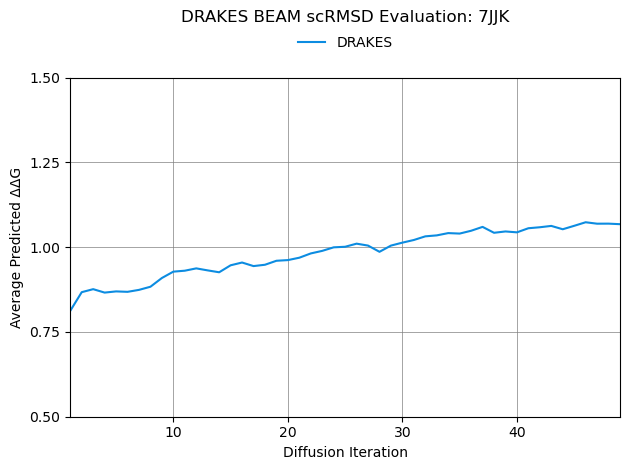

In [7]:
plt.style.use('default')

fig, ax = plt.subplots()
ax.grid(color='gray', linewidth=0.5)
ax.plot(diff_iteration, reward_average, color='#0C8CE1', label='DRAKES')
ax.set_ylabel('Average Predicted ΔΔG')
ax.set_xlabel('Diffusion Iteration')
ax.tick_params(axis='y', labelcolor='black')
all_reward = reward_average
ax.set_ylim(min(all_reward), max(all_reward))
ax.set_xlim(min(diff_iteration), max(diff_iteration))
y_min = floor(min(all_reward) * 2) / 2
y_max = ceil(max(all_reward) * 2) / 2
ax.set_yticks(np.linspace(y_min, y_max, num=5))

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.16), ncol=2, frameon=False)
plt.title('DRAKES BEAM scRMSD Evaluation: 7JJK', pad=40)
plt.tight_layout()
plt.show()

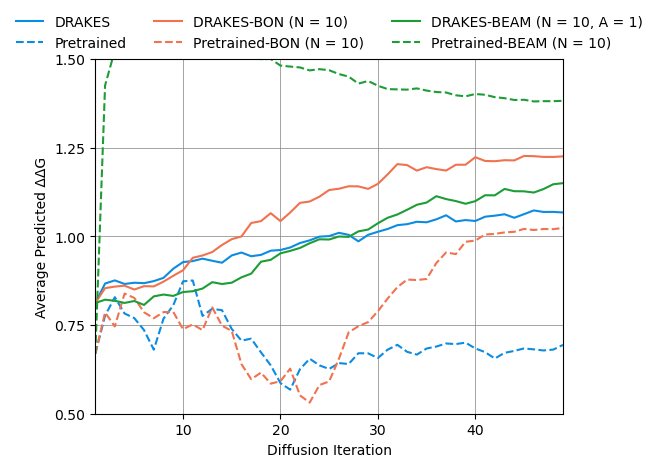

In [10]:
plt.style.use('default')

fig, ax = plt.subplots()
reward_average_beam_10_old
ax.grid(color='gray', linewidth=0.5)
ax.plot(diff_iteration, reward_average, color='#0C8CE1', label='DRAKES')
ax.plot(diff_iteration, reward_average_old, color='#0C8CE1', label='Pretrained', linestyle='--')
ax.plot(diff_iteration, reward_average_bon_10, color='#F0724F', label='DRAKES-BON (N = 10)')
ax.plot(diff_iteration, reward_average_bon_10_old, color='#F0724F', label='Pretrained-BON (N = 10)', linestyle='--')
ax.plot(diff_iteration, reward_average_beam_10, color='#1C9D36', label='DRAKES-BEAM (N = 10, A = 1)')
ax.plot(diff_iteration, reward_average_beam_10_old, color='#1C9D36', label='Pretrained-BEAM (N = 10)', linestyle='--')
# ax.plot(diff_iteration, reward_average_soft_beam_10, color='#DB67D3', label='Soft BEAM (N = 10)')
ax.set_ylabel('Average Predicted ΔΔG')
ax.set_xlabel('Diffusion Iteration')
ax.tick_params(axis='y', labelcolor='black')
all_reward = np.concatenate((reward_average, reward_average_old, reward_average_bon_10, reward_average_bon_10_old, reward_average_beam_10))# reward_average_beam_10_1_5))
ax.set_ylim(min(all_reward), max(all_reward))
ax.set_xlim(min(diff_iteration), max(diff_iteration))
y_min = floor(min(all_reward) * 2) / 2
y_max = ceil(max(all_reward) * 2) / 2
ax.set_yticks(np.linspace(y_min, y_max, num=5))

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.16), ncol=3, frameon=False)
#plt.title('DRAKES Best-of-N Evaluation: 7JJK', pad=40)
plt.tight_layout()
plt.show()

In [13]:
print("---Pretrained---")
pretrain_stats_7jjk = display_eval(df_pre, '7JJK')

print("\n---DRAKES---")
drakes_stats_7jjk = display_eval(df_drakes, '7JJK')

print("\n---BON 10---")
bon_10_file = 'data/beam_data/distribution/original_new_10_0.5_0_results_merge_new_7JJK_scrmsd_beam_10_1_50.csv'#original_new_10_0.5_0_results_merge_beam_rmsd_10_1_10.csv'#original_new_10_0.5_0_results_merge_beam_10_test.csv'
#'data/bon_data/distribution/original_new_10_0.5_0_results_merge_bon_10_test.csv' 
df_bon_10 = pd.read_csv(bon_10_file)
bon_10_stats_7jjk = display_eval(df_bon_10, '7JJK')

print("\n---BEAM 10---")
beam_10_file = 'data/beam_data/distribution/original_new_10_0.5_0_results_merge_new_7JJK_scrmsd_beam_10_1_10.csv'#original_new_10_0.5_0_results_merge_beam_10_test.csv'
df_beam_10 = pd.read_csv(beam_10_file)
beam_10_stats_7jjk = display_eval(df_beam_10, '7JJK')

---Pretrained---
Pred-ddG (median)↑: 0.806
%(ddG > 0) (%)↑: 76.6
scRMSD (median)↓: 0.874
%(scRMSD < 2)(%)↑: 92.2
Success Rate (%)↑: 71.1

---DRAKES---
Pred-ddG (median)↑: 1.078
%(ddG > 0) (%)↑: 99.2
scRMSD (median)↓: 0.927
%(scRMSD < 2)(%)↑: 99.2
Success Rate (%)↑: 98.4

---BON 10---
Pred-ddG (median)↑: 1.423
%(ddG > 0) (%)↑: 100.0
scRMSD (median)↓: 0.849
%(scRMSD < 2)(%)↑: 100.0
Success Rate (%)↑: 100.0

---BEAM 10---
Pred-ddG (median)↑: 1.477
%(ddG > 0) (%)↑: 100.0
scRMSD (median)↓: 0.854
%(scRMSD < 2)(%)↑: 100.0
Success Rate (%)↑: 100.0


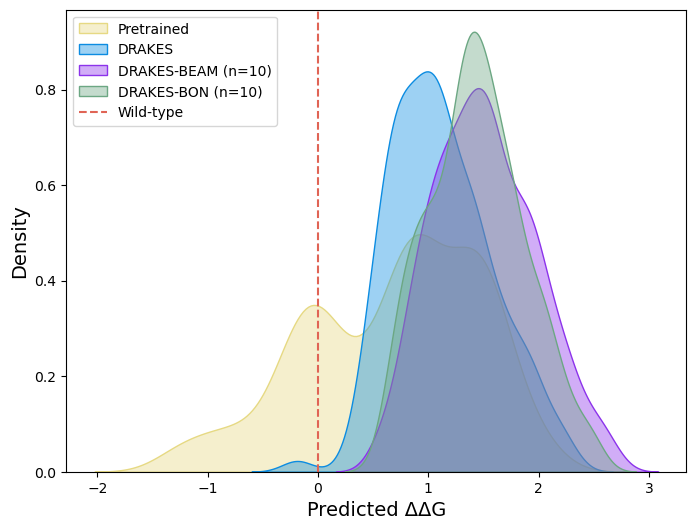

In [14]:
analyze_protein_gen_helper('7JJK', [df_pre, df_drakes, df_beam_10, df_bon_10], ['Pretrained', 'DRAKES', 'DRAKES-BEAM (n=10)', 'DRAKES-BON (n=10)'], ['#E6D983', '#0C8CE1', '#8C33EB', '#6CA783'])

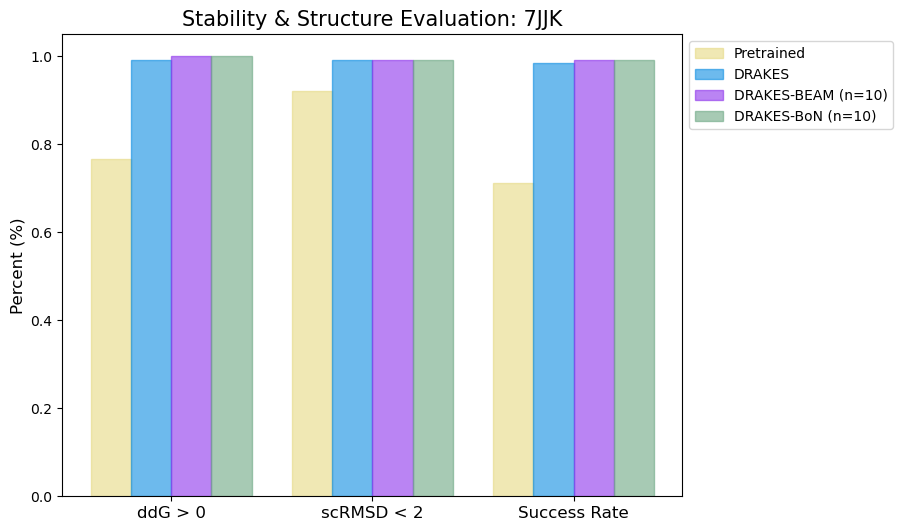

In [7]:
algorithms = ['Pretrained', 'DRAKES', 'DRAKES-BEAM (n=10)', 'DRAKES-BoN (n=10)']
colors = ['#E6D983', '#0C8CE1', '#8C33EB', '#6CA783']
stats = [pretrain_stats_7jjk, drakes_stats_7jjk, beam_10_stats_7jjk, bon_10_stats_7jjk]
pos_ddg_prop = [stat["pos_ddg_prop"] for stat in stats]
low_rmsd_prop = [stat["low_rmsd_prop"] for stat in stats]
success_prop = [stat["success_rate"] for stat in stats]
categories = ["ddG > 0", "scRMSD < 2", "Success Rate"]

x = np.arange(len(categories))
width = 0.2 

fig, ax = plt.subplots(figsize=(8, 6))
for i, (algorithm, color) in enumerate(zip(algorithms, colors)):
    ax.bar(x + (i - 1.5) * width, [pos_ddg_prop[i], low_rmsd_prop[i], success_prop[i]], width, label=algorithm, color=color, edgecolor=color, alpha=0.6)

ax.set_ylabel('Percent (%)', fontsize=12)
ax.set_ylim(bottom=0)
ax.set_title('Stability & Structure Evaluation: 7JJK', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.legend()
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
# n_vals = [5, 10, 50, 100]
# intervals = [1, 2, 3, 4, 5, 10, 15, 25, 50]
# cmap = plt.get_cmap('GnBu')
# colors = [cmap(i / (len(n_vals) + 1)) for i in range(2, len(n_vals) + 2)][::-1]
# pred_ddg_med_data = []
# reward_average_base = df_diff['Reward Average']
# baseline = reward_average_base[reward_average_base.shape[0] - 1]
# for n in n_vals:
#     data = []
#     pred_ddg_med_data.append(data)
#     for interval in intervals:
#         fn = f'data/bon_data/trajectory/intervals/diffusion_analysis_new_7JJK_bon_{n}_interval_{interval}.csv'
#         df = pd.read_csv(fn)
#         reward_average = df['Reward Average']
#         data.append(reward_average[reward_average.shape[0] - 1])
#     data.append(baseline)

# proportions = [1 / t for t in intervals]
# proportions = proportions + [0]

# plt.figure(figsize=(8, 5))
# for i, n in enumerate(n_vals):
#     plt.plot(proportions, pred_ddg_med_data[i], color=colors[i], linewidth=3, label=f'Best-of-N={n}')
# plt.axhline(y=baseline, color='r', linestyle='--', linewidth=2, label='Baseline')
# plt.xlabel('Best-of-N Steps Proportion')
# plt.ylabel('Average Predicted ΔΔG')
# plt.xlim(left=0, right=1)
# plt.title('DRAKES Best-of-N Interval Evaluation: 7JJK')
# plt.legend()s
# plt.grid(True)

# plt.show()